# Solution

# Задание 1. SHAP. Табличные данные: Breast cancer wisconsin
Используя табличные данные [Breast cancer Wisconsin](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) (набор данных о раке молочной железы в Висконсине), обучите две модели: градиентный бустинг и случайный лес. Визуализируйте вклады признаков в предсказания этих моделей для одного объекта выборки и для всей выборки в целом.

## Формат результата

В результате выполнения задания должны получиться графики:
* [`shap.force_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.force_plot.html) для одного объекта выборки для разных моделей.

Пример визуализации:
<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX14/result_1_3_task_ex14.png" width="1000">

* [`shap.summary_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html) (типов `bar` и `layered_violin`) для разных моделей.

Примеры визуализации:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX14/result_2_3_task_ex14.png"  width="500">
<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX14/result_3_3_task_ex14.png"  width="500">

## Обучение моделей



Импорт библиотек:

In [ ]:
import sklearn.ensemble
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from IPython.display import clear_output

try:
    import shap
except ModuleNotFoundError:
    !pip install shap
    clear_output()
    import shap

Загрузка данных, разбиение на обучающую и тестовую выборки:

In [ ]:
import sklearn

dataset = sklearn.datasets.load_breast_cancer()

features = pd.DataFrame(data=dataset["data"], columns=dataset["feature_names"])
target = dataset["target"]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)
print(dataset.target_names)
features.head()

['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Создайте и обучите на обучающих данных две модели: случайный лес и градиентный бустинга.

In [ ]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

model_rf = RandomForestClassifier()
model_xgb = xgb.XGBClassifier()

model_rf.fit(x_train, y_train)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Визуализация SHAP

Создайте SHAP-модели объяснения предсказаний. Используйте [`shap.TreeExplainer`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.TreeExplainer.html)

In [ ]:
# Your code here
# Use shap.TreeExplainer

explainer_rf = shap.TreeExplainer(model_rf)
explainer_xgb = shap.TreeExplainer(model_xgb)

Выберите один объект из датасета и выведите для него предсказания обученных моделей

In [ ]:
sample_idx = 0  # Your index here

sample = x_train.iloc[[sample_idx]]
sample

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.313,0.04375,0.2111,0.08046,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.175,0.4228,0.1175


Предсказание модели случайного леса (воспользуйтесь методами `predict` и `predict_proba`):

In [ ]:
# Your code here
pred_class_rf = model_rf.predict(sample).item()
print("RF predicted class:", pred_class_rf, dataset.target_names[pred_class_rf])

pred_probs_rf = model_rf.predict_proba(sample)[0]
print("Class probabilities", pred_probs_rf)

RF predicted class: 1 benign
Class probabilities [0.13 0.87]


Получите SHAP-значения для данного предсказания

In [ ]:
# Your code here
# returns list with 2 elements of shape [ds_len , features_num]
shap_values_rf = explainer_rf.shap_values(sample)
print(len(shap_values_rf), shap_values_rf[pred_class_rf].shape)

shap_values_rf[pred_class_rf]

2 (1, 30)


array([[ 3.78742427e-02,  1.04029189e-03,  2.38482490e-02,
         2.82526735e-02, -1.13928843e-03,  1.23367357e-03,
        -2.08076224e-02,  7.03001599e-02, -5.17418767e-03,
        -1.60940466e-05,  3.64660990e-03, -1.71711766e-04,
         6.98840172e-04,  2.44476767e-02,  3.60903405e-03,
         5.61157613e-05,  3.99729911e-02,  3.57795387e-03,
         2.33264669e-03,  8.39664417e-03,  7.25826084e-02,
         2.04146463e-02,  6.61031710e-02,  6.68231370e-02,
        -1.62183471e-03, -2.75899767e-02, -2.26876211e-02,
        -1.20804338e-01, -2.96930858e-02, -2.29681395e-03]])

Постройте объяснение предсказания модели случайного леса. Используйте [`shap.force_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.force_plot.html)

Expected values [0.37320879 0.62679121]


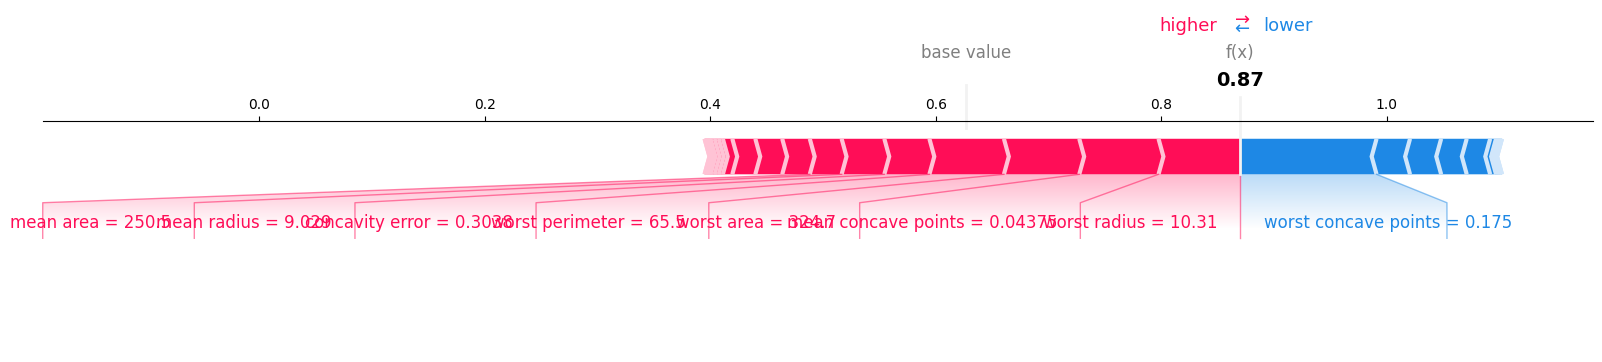

In [ ]:
# Your code here
print("Expected values", explainer_rf.expected_value)  # one value per class

base_value_pred_class = explainer_rf.expected_value[pred_class_rf]  # base for predicted class!
shap_values_pred_class = shap_values_rf[pred_class_rf]  # shap values for predicted class!

shap.initjs()
shap.force_plot(base_value_pred_class, shap_values_pred_class, sample, matplotlib=True)

Повторите шаги для модели градиентного бустинга

In [ ]:
# Your code here
pred_class_xgb = model_xgb.predict(sample).item()
print("XGB predicted class:", pred_class_xgb, dataset.target_names[pred_class_xgb])

pred_probs_xgb = model_xgb.predict_proba(sample)[0]
print("Class probabilities", pred_probs_xgb)

XGB predicted class: 1 benign
Class probabilities [0.02075845 0.97924155]


In [ ]:
shap_values_xgb = explainer_xgb.shap_values(sample)
shap_values_xgb

array([[ 0.05721627,  0.2565738 ,  0.        ,  0.19283043, -0.19344369,
         0.16196105, -0.16847718,  1.0369405 ,  0.        ,  0.07219206,
         0.03188827,  0.01455617,  0.05060888,  0.5767495 , -0.01305988,
         0.53749347,  0.01662704, -0.24560729,  0.43055063,  0.08782563,
         0.7262879 ,  1.3457642 ,  0.49329552,  1.4075081 , -0.3419093 ,
         0.        , -0.46160445, -2.3122354 , -0.57550025,  0.        ]],
      dtype=float32)

Expected value 0.6687895


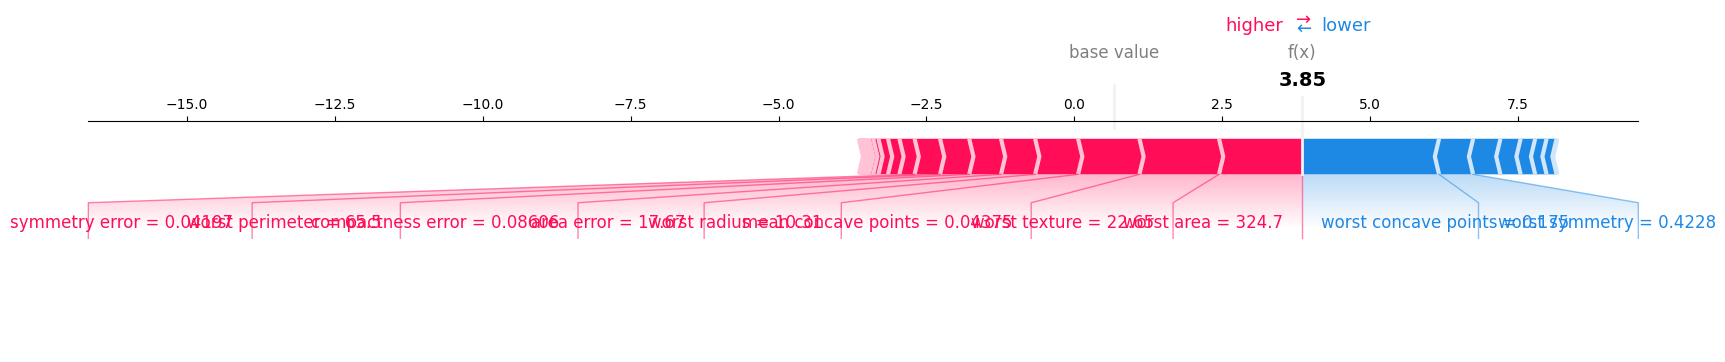

In [ ]:
print("Expected value", explainer_xgb.expected_value)  # one value it's not a probability?

base_value = explainer_xgb.expected_value

shap.initjs()
shap.force_plot(base_value, shap_values_xgb, sample, matplotlib=True)

Теперь постройте для моделей [`summary_plot`](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Scatter%20Density%20vs.%20Violin%20Plot%20Comparison.html?highlight=summary_plot) типа `bar`. Он поможет объяснить важность признаков для моделей на всем датасете в целом

График для модели случайного леса:

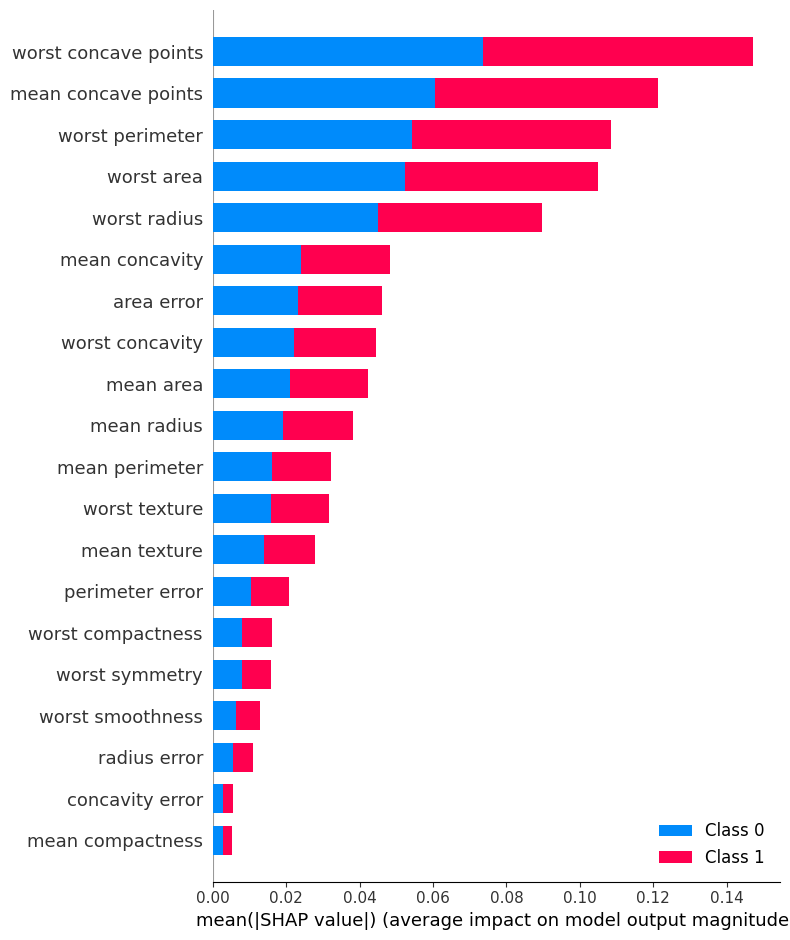

In [ ]:
# Your code here
# shap.summary_plot(..., plot_type="bar")

shap_values_rf = explainer_rf.shap_values(x)
shap.summary_plot(shap_values_rf, x, plot_type="bar")

График для модели градиентного бустинга:

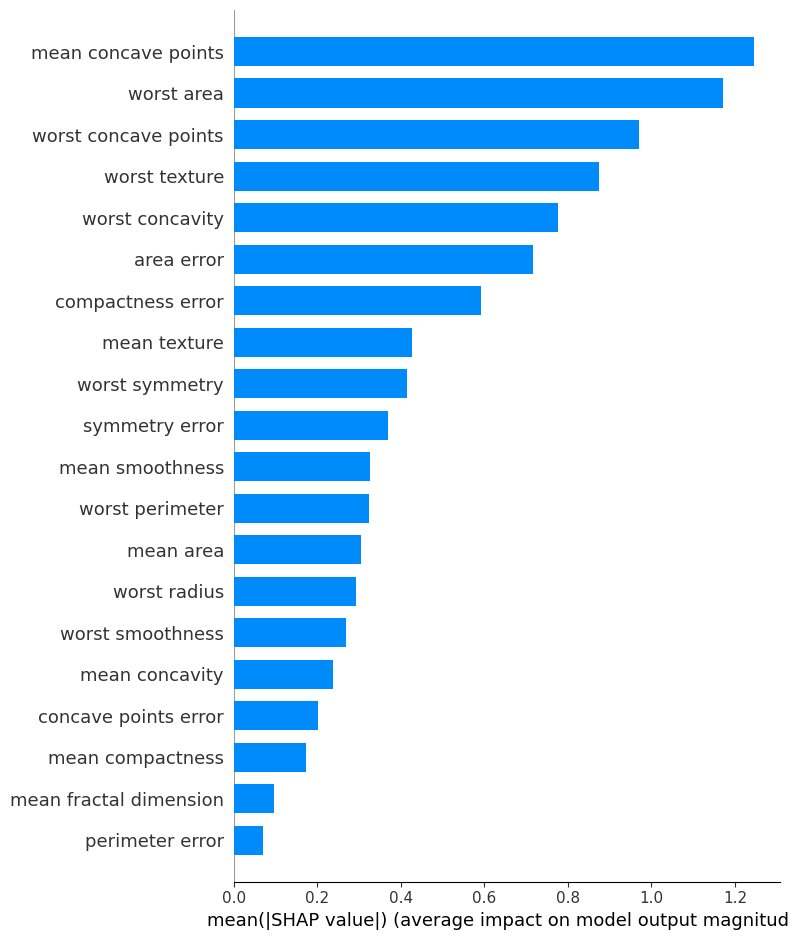

In [ ]:
# Your code here
# shap.summary_plot(..., plot_type="bar")

shap_values_xgb = explainer_xgb.shap_values(x)
shap.summary_plot(shap_values_xgb, x, plot_type="bar")

Постройте `summary_plot` типа `layered_violin`.

График для модели случайного леса:

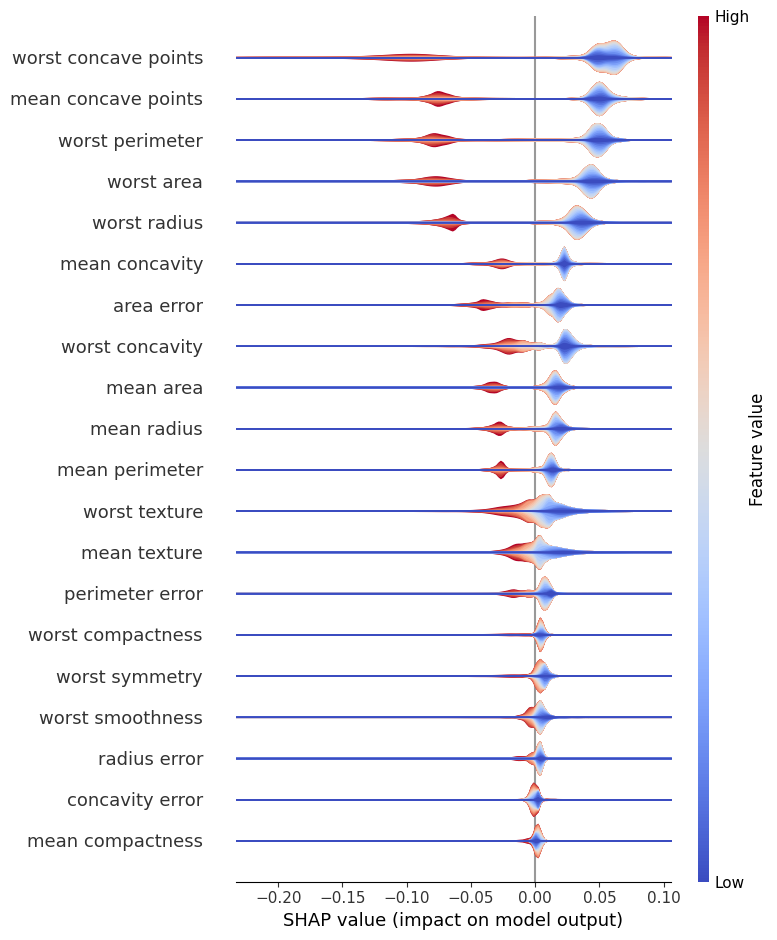

In [ ]:
# Your code here
# shap.summary_plot(..., plot_type="layered_violin", color='coolwarm')

shap.summary_plot(shap_values_rf[1], x, plot_type="layered_violin", color="coolwarm")

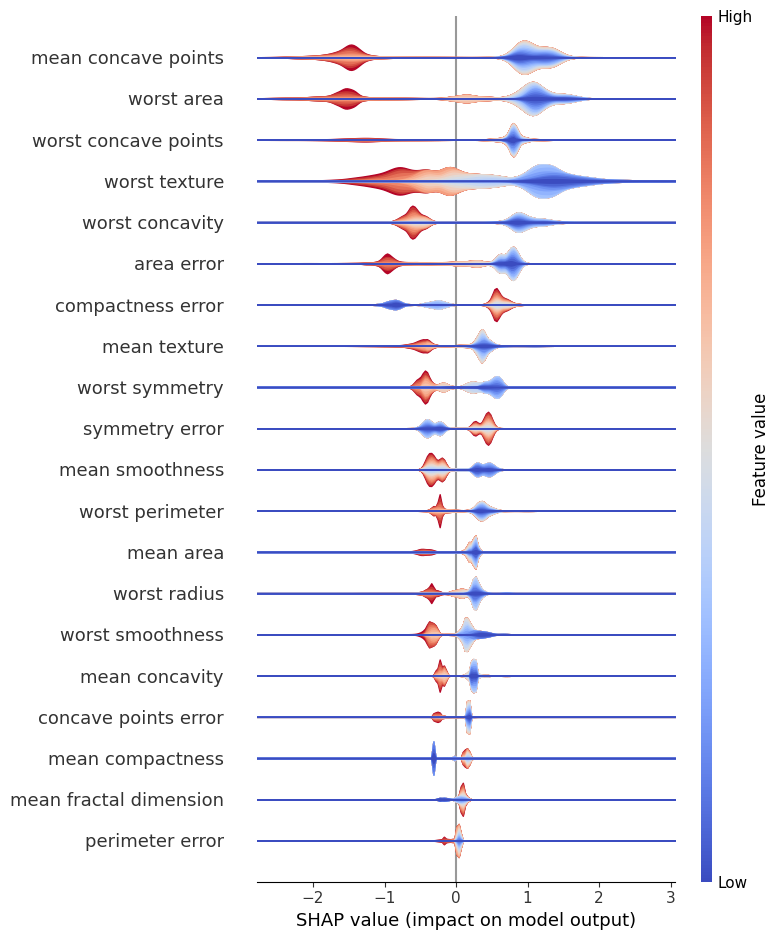

In [ ]:
# Your code here
# shap.summary_plot(..., plot_type="layered_violin", color='coolwarm')


shap.summary_plot(shap_values_xgb, x, plot_type="layered_violin", color="coolwarm")

На какие признаки обращают внимание модели? Есть ли различия?

**Напишите вывод:**


## Памятка для преподавателя

В этом задании студенты изучают методы визуализации SHAP для табличных данных.

Тут есть особенность, связанная с тем, как осуществляют бинарную классификацию древесные модели: некоторые выдают одно значение (вероятность положительного класса), например `xgboost.XGBClassifier`, а некоторые — два (вероятность отрицательного класса и вероятность положительного класса), например `sklearn.ensemble.RandomForestClassifier`. Из-за этого у студентов могут возникнуть сложности.


# Версия для студентов

# Задание 1. SHAP. Табличные данные: Breast cancer wisconsin
Используя табличные данные [Breast cancer Wisconsin](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) (набор данных о раке молочной железы в Висконсине), обучите две модели: градиентный бустинг и случайный лес. Визуализируйте вклады признаков в предсказания этих моделей для одного объекта выборки и для всей выборки в целом.

## Формат результата

В результате выполнения задания должны получиться графики:
* [`shap.force_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.force_plot.html) для одного объекта выборки для разных моделей.

Пример визуализации:
<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX14/result_1_3_task_ex14.png" width="1000">

* [`shap.summary_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html) (типов `bar` и `layered_violin`) для разных моделей.

Примеры визуализации:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX14/result_2_3_task_ex14.png"  width="500">
<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX14/result_3_3_task_ex14.png"  width="500">

## Обучение моделей



Импорт библиотек:

In [ ]:
import sklearn.ensemble
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from IPython.display import clear_output

try:
    import shap
except ModuleNotFoundError:
    !pip install shap
    clear_output()
    import shap

Загрузка данных, разбиение на обучающую и тестовую выборки:

In [ ]:
import sklearn

dataset = sklearn.datasets.load_breast_cancer()

features = pd.DataFrame(data=dataset["data"], columns=dataset["feature_names"])
target = dataset["target"]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)
print(dataset.target_names)
features.head()

Создайте и обучите на обучающих данных две модели: случайный лес и градиентный бустинга.

In [ ]:
# Your code here


## Визуализация SHAP

Создайте SHAP-модели объяснения предсказаний. Используйте [`shap.TreeExplainer`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.TreeExplainer.html)

In [ ]:
# Your code here
# Use shap.TreeExplainer


Выберите один объект из датасета и выведите для него предсказания обученных моделей

In [ ]:
sample_idx =  # Your index here

sample = x_train.iloc[[sample_idx]]
sample

Предсказание модели случайного леса (воспользуйтесь методами `predict` и `predict_proba`):

In [ ]:
# Your code here


Получите SHAP-значения для данного предсказания

In [ ]:
# Your code here


Постройте объяснение предсказания модели случайного леса. Используйте [`shap.force_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.force_plot.html)

In [ ]:
# Your code here


Повторите шаги для модели градиентного бустинга

In [ ]:
# Your code here


Теперь постройте для моделей [`summary_plot`](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Scatter%20Density%20vs.%20Violin%20Plot%20Comparison.html?highlight=summary_plot) типа `bar`. Он поможет объяснить важность признаков для моделей на всем датасете в целом

График для модели случайного леса:

In [ ]:
# Your code here
# shap.summary_plot(..., plot_type="bar")


График для модели градиентного бустинга:

In [ ]:
# Your code here
# shap.summary_plot(..., plot_type="bar")


Постройте `summary_plot` типа `layered_violin`.

График для модели случайного леса:

In [ ]:
# Your code here
# shap.summary_plot(..., plot_type="layered_violin", color='coolwarm')


In [ ]:
# Your code here
# shap.summary_plot(..., plot_type="layered_violin", color='coolwarm')



На какие признаки обращают внимание модели? Есть ли различия?

**Напишите вывод:**
